# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**: UCI ML Reprository
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('/home/averroes/Documents/code/SMSML_Thoriq-Dhiya-A/Eksperimen_SML_Thoriq-Dhiya-A/ObesityDataSet_raw_and_data_sinthetic.csv')
print(df.head())
print(df.info())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

       Gender          Age       Height       Weight  \
count    2111  2111.000000  2111.000000  2111.000000   
unique      2          NaN          NaN          NaN   
top      Male          NaN          NaN          NaN   
freq     1068          NaN          NaN          NaN   
mean      NaN    24.312600     1.701677    86.586058   
std       NaN     6.345968     0.093305    26.191172   
min       NaN    14.000000     1.450000    39.000000   
25%       NaN    19.947192     1.630000    65.473343   
50%       NaN    22.777890     1.700499    83.000000   
75%       NaN    26.000000     1.768464   107.430682   
max       NaN    61.000000     1.980000   173.000000   

       family_history_with_overweight  FAVC         FCVC          NCP  \
count                            2111  2111  2111.000000  2111.000000   
unique                              2     2          NaN          NaN   
top                               yes   yes          NaN          NaN   
freq                             17

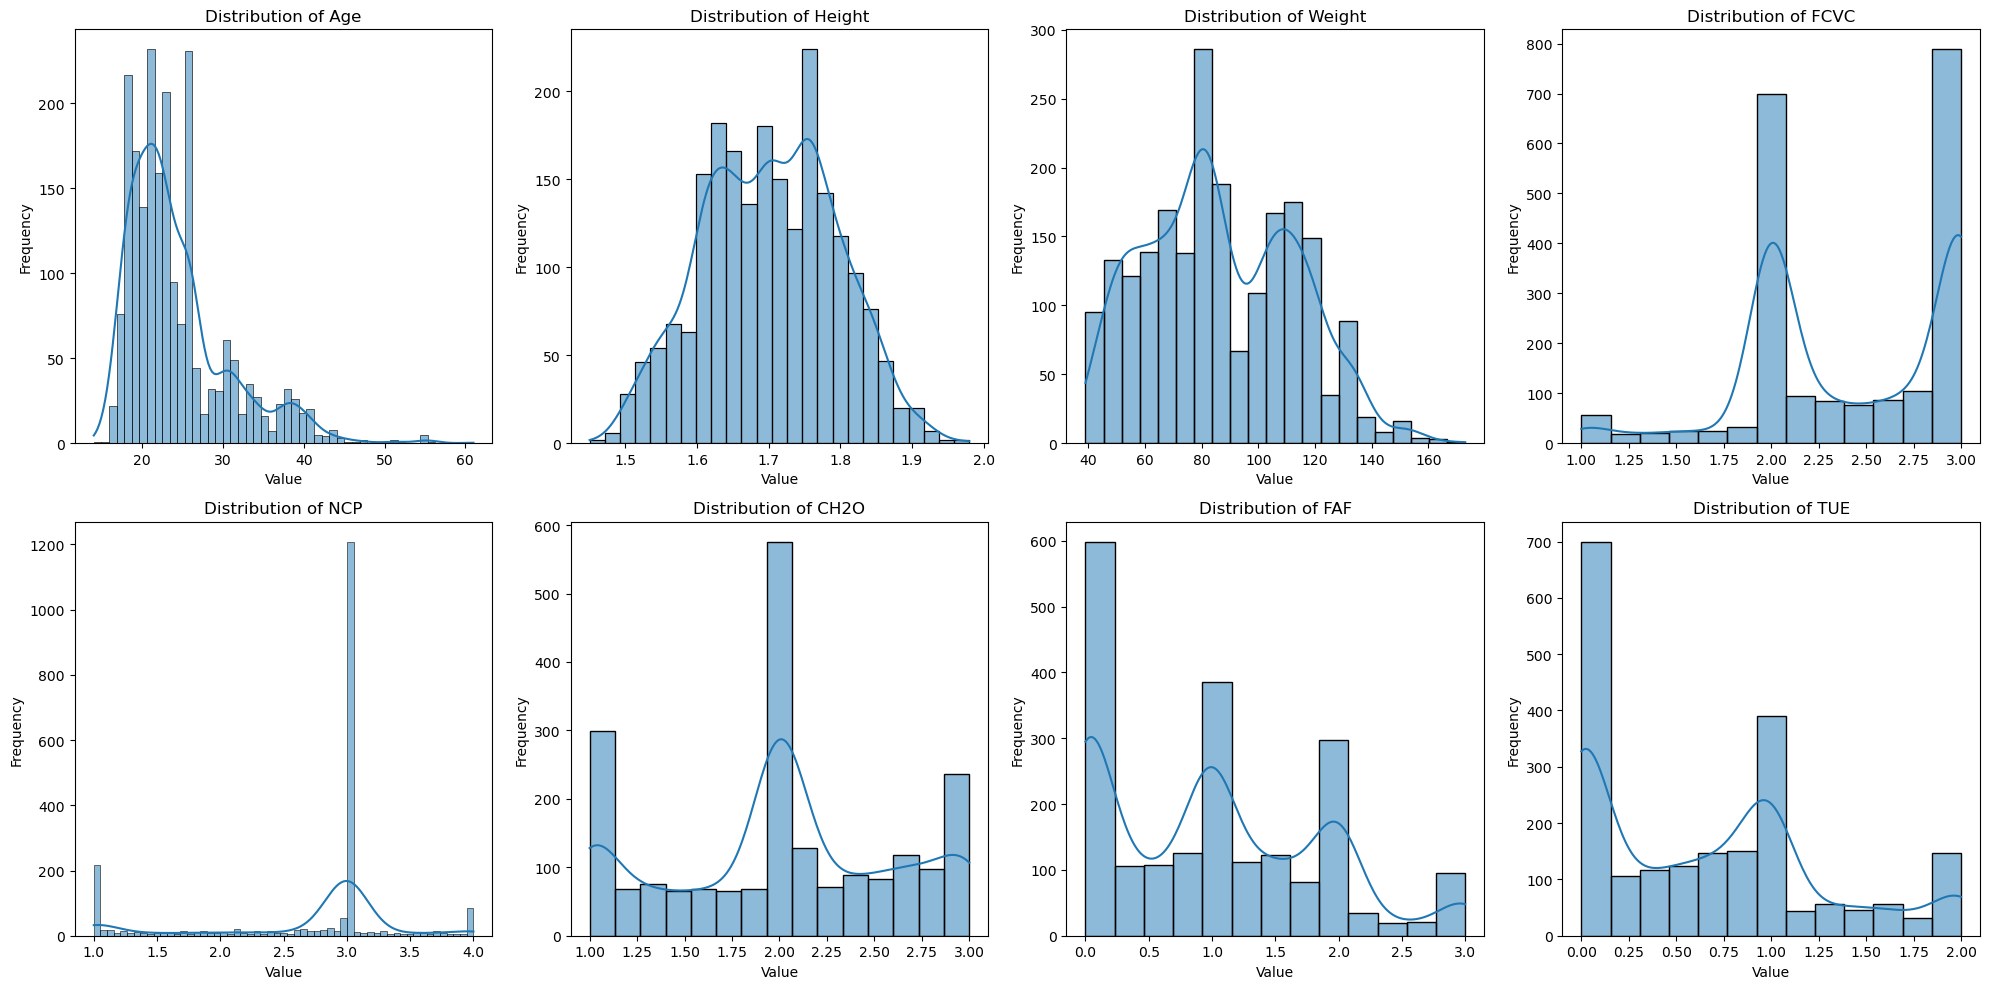

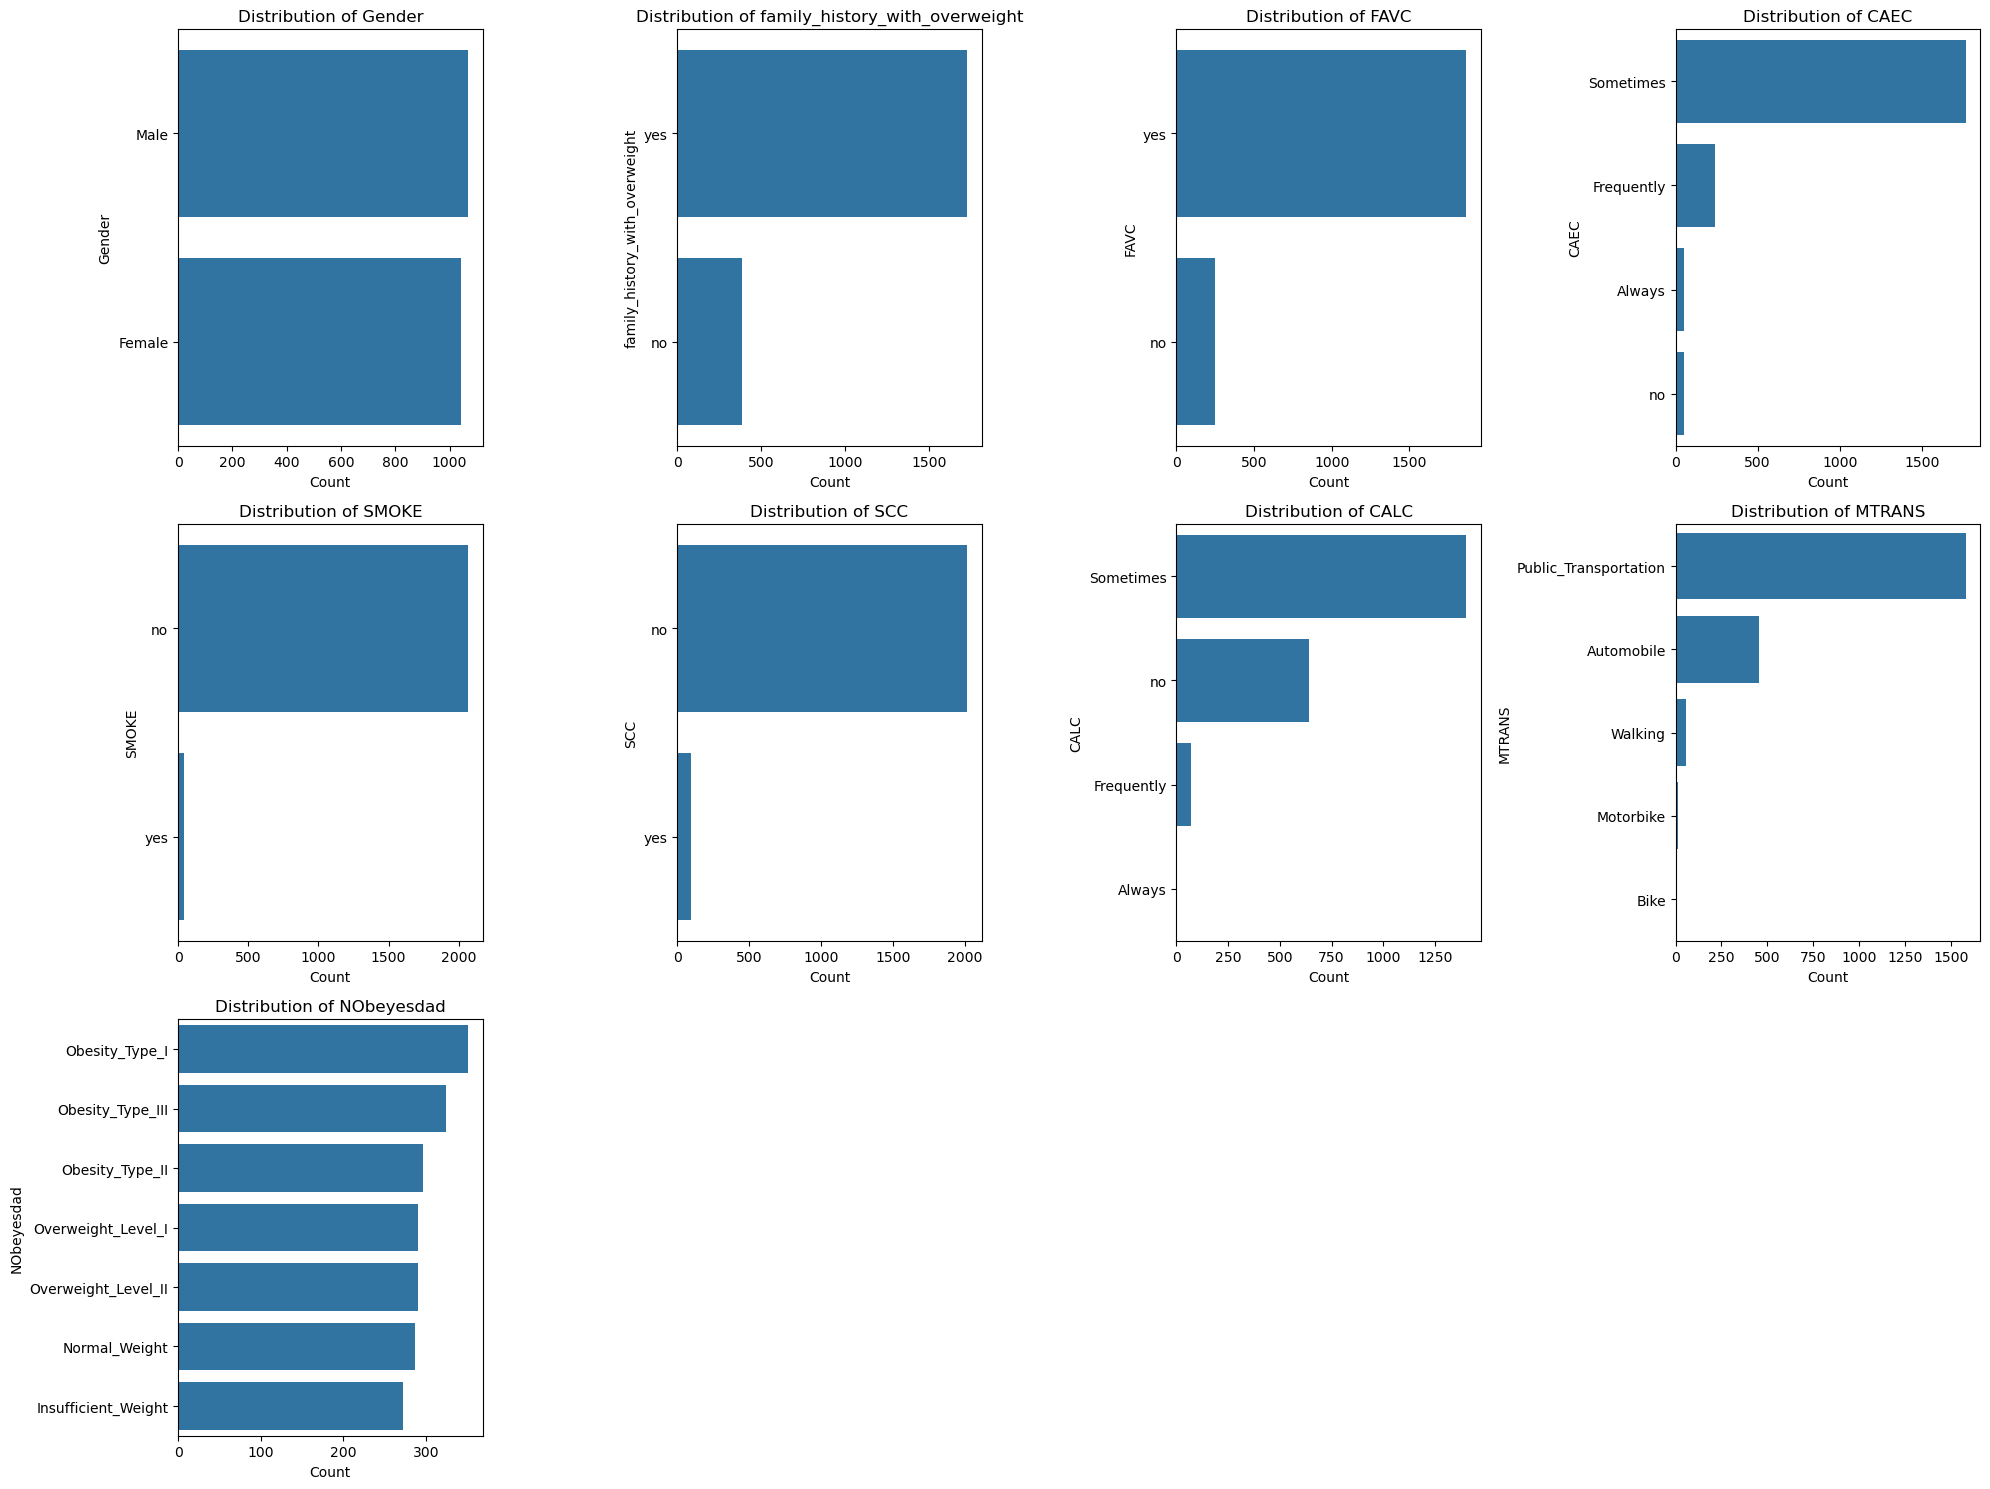

In [3]:
def plot_numerical_distributions(df):
    num_var = df.select_dtypes(include=['int64', 'float64']).columns

    n_cols = 4
    n_rows = int(np.ceil(len(num_var) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

    axes = axes.flatten()

    for i, var in enumerate(num_var):
        sns.histplot(df[var], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {var}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

def plot_categorical_distributions(df):
    cat_var = df.select_dtypes(include=['object']).columns

    n_cols = 4
    n_rows = int(np.ceil(len(cat_var) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

    axes = axes.flatten()

    for i, var in enumerate(cat_var):
        sns.countplot(y=df[var], ax=axes[i], order=df[var].value_counts().index)
        axes[i].set_title(f'Distribution of {var}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(var)
          
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

print(df.describe(include='all'))
plot_numerical_distributions(df)
plot_categorical_distributions(df)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
le = LabelEncoder()

def remove_outliers(df):
    num_var = ['Age', 'Height', 'Weight']
    for var in num_var:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]
    return df

def normalize_numerical(df):
    num_var = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    df[num_var] = scaler.fit_transform(df[num_var])
    return df
    
def encode_categorical(df):
    cat_var = df.select_dtypes(include=['object']).columns
    for var in cat_var:
        df[var] = le.fit_transform(df[var])
    return df

df_preprocessed = df.dropna()
df_preprocessed = remove_outliers(df_preprocessed)
df_preprocessed = normalize_numerical(df_preprocessed)
df_preprocessed = encode_categorical(df_preprocessed)
print(df_preprocessed.head())

   Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0 -0.452069 -0.923765 -0.842720                               1     0   
1       0 -0.452069 -2.008933 -1.140624                               1     0   
2       1  0.012525  1.029538 -0.358625                               1     0   
3       1  0.941713  1.029538  0.013755                               0     0   
4       1 -0.219772  0.812504  0.118022                               0     0   

       FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0 -0.782856  0.393442     2      0 -0.030303    0 -1.212373  0.500794     3   
1  1.054583  0.393442     2      1  1.605693    1  2.335221 -1.142892     2   
2 -0.782856  0.393442     2      0 -0.030303    0  1.152689  0.500794     1   
3  1.054583  0.393442     2      0 -0.030303    0  1.152689 -1.142892     1   
4 -0.782856 -2.176128     2      0 -0.030303    0 -1.212373 -1.142892     2   

   MTRANS  NObeyesdad  
0       3     

In [21]:
# save normalization parameters and label encoders
import os
import pickle
os.makedirs('models', exist_ok=True)
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('models/label_encoders.pkl', 'wb') as f:
    pickle.dump(le, f)